# Exploratory analysis

A brief exploratory analysis example. 

## Library and color scale

In [1]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
loadlibrary("MASS")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")
loadlibrary("GGally")

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.1"Loading required package: scales
Warning message:
"package 'scales' was built under R version 3.5.1"Loading required package: MASS
Loading required package: RColorBrewer
Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.5.1"Loading required package: GGally
Warning message:
"package 'GGally' was built under R version 3.5.1"

## Loading iris dataset
The exploratory analysis is done using iris dataset.
A preliminary analysis using iris$Sepal.Length attribute. 
The attribute is discretized. 

In [2]:
data(iris)
summary(iris$Sepal.Length)

table(iris$Sepal.Length)

sepal.length = round(iris$Sepal.Length)
table(sepal.length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.300   5.100   5.800   5.843   6.400   7.900 


4.3 4.4 4.5 4.6 4.7 4.8 4.9   5 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9   6 6.1 6.2 
  1   3   1   4   2   5   6  10   9   4   1   6   7   6   8   7   3   6   6   4 
6.3 6.4 6.5 6.6 6.7 6.8 6.9   7 7.1 7.2 7.3 7.4 7.6 7.7 7.9 
  9   7   5   2   8   3   4   1   1   3   1   1   1   4   1 

sepal.length
 4  5  6  7  8 
 5 47 68 24  6 

## Mode

In [3]:
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}
getmode(round(iris$Sepal.Length))

[1] 6

## Density distribution
The attribute Sepal.Length is observed.
Grouping this attribute according to Species provides a better understanding of the data.

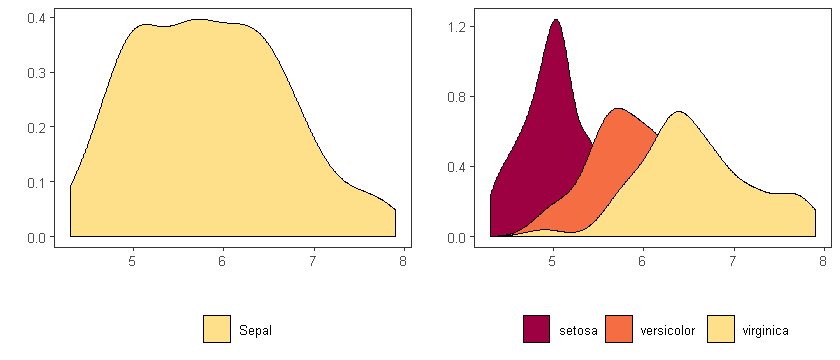

In [4]:
series <- data.frame(variable="Sepal", value=iris$Sepal.Length)
grfA <- plot.density(series, colors=mycolors[3])

series <- data.frame(variable=iris$Species, value=iris$Sepal.Length)
grfB <- plot.density(series, colors=mycolors[c(1:3)])

options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(grfA, grfB, ncol=2)

## Box-plot analysis

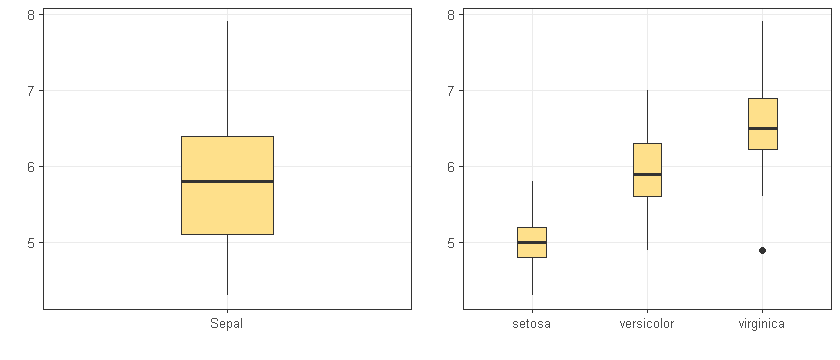

In [5]:
series <- data.frame(variable="Sepal", value=iris$Sepal.Length)
grfA <- plot.boxplot(series, colors=mycolors[3])

series <- data.frame(variable=iris$Species, value=iris$Sepal.Length)
grfB <- plot.boxplot(series, colors=mycolors[3])

options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(grfA, grfB, ncol=2)

## Histogram analysis

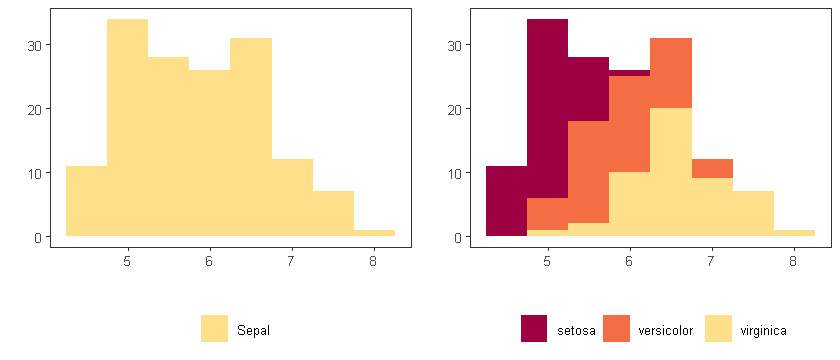

In [6]:
series <- data.frame(variable="Sepal", value=iris$Sepal.Length)
grfA <- plot.hist(series, colors=mycolors[3], bin=0.5)

series <- data.frame(variable=iris$Species, value=iris$Sepal.Length)
grfB <- plot.hist(series, colors=mycolors[c(1:3)], bin=0.5)

options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(grfA, grfB, ncol=2)

## Checking for normal distribution

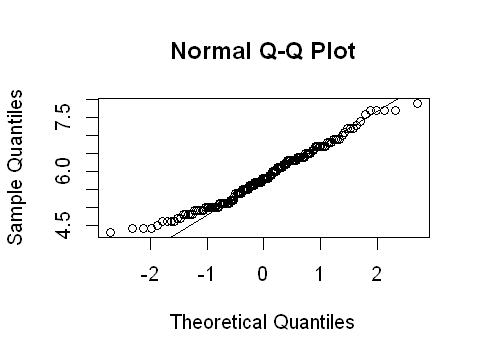

In [7]:
options(repr.plot.width=4, repr.plot.height=3)
qqnorm(iris$Sepal.Length)
qqline(iris$Sepal.Length)

## Correlation analysis

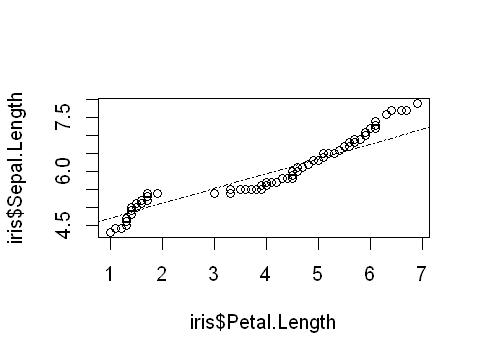

In [8]:
options(repr.plot.width=4, repr.plot.height=3)
qqplot(iris$Petal.Length, iris$Sepal.Length)
fm <- lm(iris$Sepal.Length ~ iris$Petal.Length)
abline(coef(fm), lty=4)

## Parallel coordinates

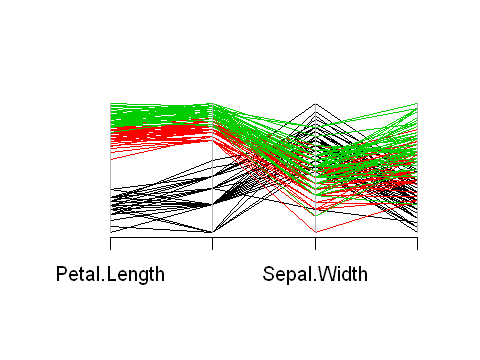

In [9]:
ir <- iris
ir$Species <- NULL
parcoord(log(ir)[, c(3, 4, 2, 1)], col = 1 + (0:149)%/%50)


## Matrix dispersion

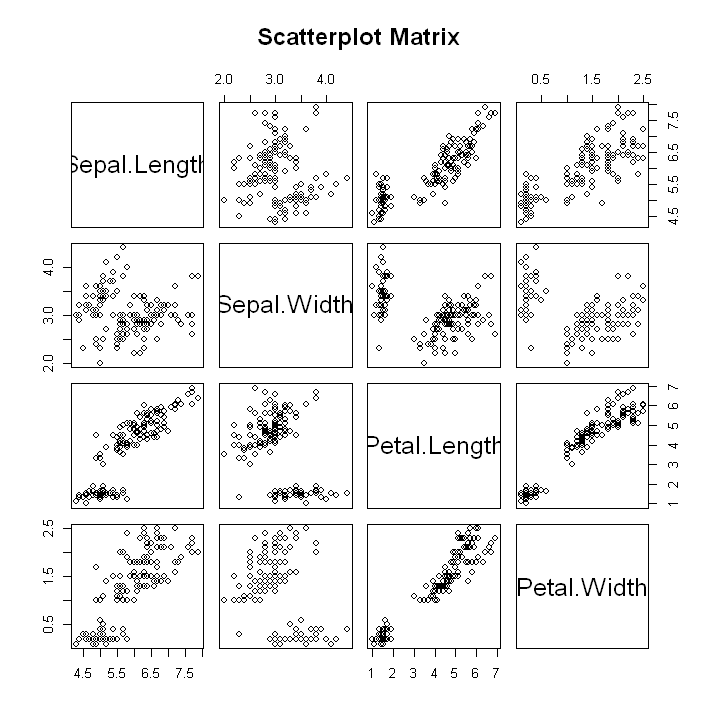

In [10]:
options(repr.plot.width=6, repr.plot.height=6)
pairs(~.,data=ir, main="Scatterplot Matrix")

## Advanced matrix dispersion

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


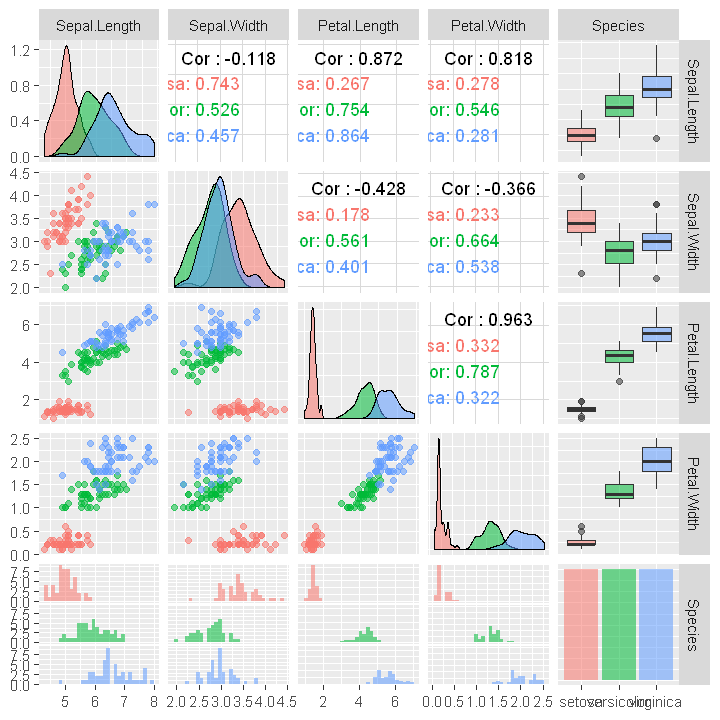

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
ggpairs(iris[,], aes(colour = Species, alpha = 0.4))